In [2]:
# Importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing data from MakeDataset.py
from MakeDataset import X_train, X_test, y_train, y_test

In [ ]:
# Shape of original data from MakeDataset.py
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (126, 500, 3)
X_test shape: (54, 500, 3)
y_train shape: (126,)
y_test shape: (54,)


In [ ]:
# Flatten X_train and X_test into 2D data
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# New data shape
print(f"X_train_flat shape: {X_train_flat.shape}")
print(f"X_test_flat shape: {X_test_flat.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train_flat shape: (126, 1500)
X_test_flat shape: (54, 1500)
y_train shape: (126,)
y_test shape: (54,)


In [12]:
# Training decision tree using sklearn
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_flat, y_train)

DecisionTreeClassifier(random_state=42)

In [13]:
# Getting predictions on test data
y_pred = model.predict(X_test_flat)

In [18]:
# Calculate required metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")

Accuracy: 0.61
Precision: 0.56
Recall: 0.61


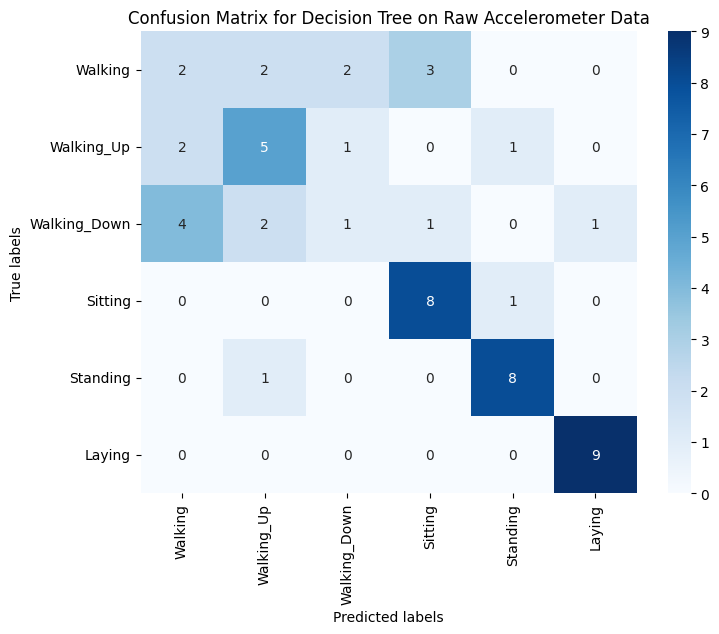

In [20]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", 
            xticklabels=["Walking","Walking_Up","Walking_Down","Sitting","Standing","Laying"],
            yticklabels=["Walking","Walking_Up","Walking_Down","Sitting","Standing","Laying"])
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for Decision Tree on Raw Accelerometer Data")
plt.show()